In [1]:
""" Code taken from:
https://click.endnote.com/viewer?doi=10.1016%2Fj.cpc.2018.02.004&token=WzI1MTkzMTMsIjEwLjEwMTYvai5jcGMuMjAxOC4wMi4wMDQiXQ.Me0dEpnjbzi1YczwpCuoLJWfP9A
"""

## Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
font_size = 14


In [2]:
## Dimensional operators
cav_dim = 40 # types of photons there can exist (thermal or participaitn gin excitation)
atm_dim = 2 # energy levels in atom, 2 for TLS
I_cav = qeye(cav_dim) # identity matrix matching dimension of radiation field
I_atom = qeye(atm_dim) # identity matrix matching dimension of spin system

## Atomic spin system operators
sigmap = tensor(sigmap(), I_cav)
sigmam = tensor(sigmam(), I_cav)
sigmaz = tensor(sigmaz(), I_cav)

## Photon operators
adag = tensor(I_atom, create(cav_dim)) # order of arguments is important and is consistant with the spin operators                
a = tensor(I_atom, destroy(cav_dim))

## Physical constants
w = 2 * np.pi * 1.45e3 # cavity frequency with vacuum field energy set to zero (zero-point energy) (MHz)
g = 1.5 #2 * np.pi * 1.1 # test spin-photon couling strength ~ np.sqrt(tls_num)*g, experimetnally it's 1.1 though. 

## Initial quantum states
psi_atm = basis(2, 1) # atom initially stat in ground state
psi_phot_fock = fock(cav_dim, 1) # exactly 16 photons in the cavity out of a possible 40
psi_phot_fock2 = fock(cav_dim, 4)
psi_phot_fock3 = fock(cav_dim, 10)

psi_phot_coher = coherent(cav_dim, np.sqrt(1)) # exactly 16 photons in the cavity out of a possible 40
psi_phot_coher2 = coherent(cav_dim, np.sqrt(4))
psi_phot_coher3 = coherent(cav_dim, np.sqrt(10))



psi0_fock = tensor(psi_atm, psi_phot_fock)
psi0_fock2 = tensor(psi_atm, psi_phot_fock2)
psi0_fock3 = tensor(psi_atm, psi_phot_fock3)

psi0_coher = tensor(psi_atm, psi_phot_coher)
psi0_coher2 = tensor(psi_atm, psi_phot_coher2)
psi0_coher3 = tensor(psi_atm, psi_phot_coher3)



## Hamiltonian
H = g*(sigmap*a + sigmam*adag)

## Collapse operators
c_ops = []

Kc = 0.2
Ks = 0.0
gamma = 0.0

c_ops.append(np.sqrt(Kc) * a)
c_ops.append(np.sqrt(Ks) * sigmaz)
c_ops.append(np.sqrt(gamma) * sigmam)

## simulation duration and master equation solver
time = 20
steps = 2000
tlist = np.linspace(0, time, steps)
result_fock = mesolve(H, psi0_fock, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_fock2 = mesolve(H, psi0_fock2, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_fock3 = mesolve(H, psi0_fock3, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))


result_coher = mesolve(H, psi0_coher, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_coher2 = mesolve(H, psi0_coher2, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_coher3 = mesolve(H, psi0_coher3, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))



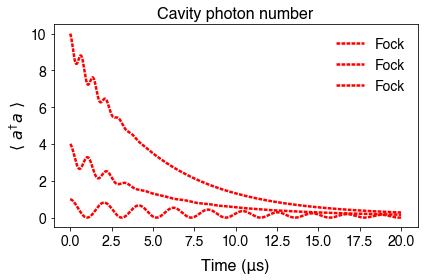

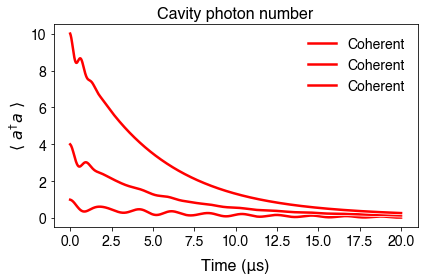

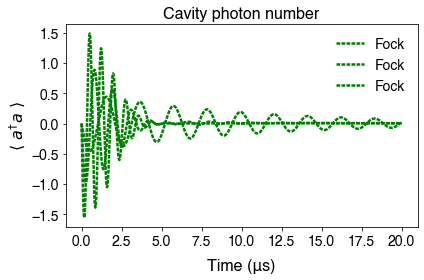

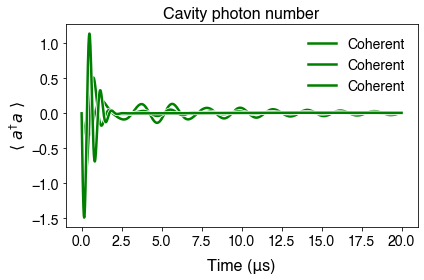

In [3]:
## Visualization

fig, ax = plt.subplots(figsize=(6,4))
plt.figure(1)
plt.plot(tlist, result_fock.expect[0], color='r', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock2.expect[0], color='r', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock3.expect[0], color='r', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
#plt.ylim([-0.07, 1.07])
plt.title('Cavity photon number', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
#plt.savefig('adag a.png', format = 'png', dpi = 900) 

fig, ax = plt.subplots(figsize=(6,4))
plt.figure(2)
plt.plot(tlist, result_coher.expect[0], color='r', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.plot(tlist, result_coher2.expect[0], color='r', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.plot(tlist, result_coher3.expect[0], color='r', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
#plt.ylim([-0.07, 1.07])
plt.title('Cavity photon number', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
#plt.savefig('adag a.png', format = 'png', dpi = 900)


fig, ax = plt.subplots(figsize=(6,4))
plt.figure(3)
plt.plot(tlist, result_fock.expect[3].imag, color='g', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock2.expect[3].imag, color='g', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock3.expect[3].imag, color='g', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
#plt.ylim([-0.07, 1.07])
plt.title('Cavity photon number', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
#plt.savefig('adag a.png', format = 'png', dpi = 900) 

fig, ax = plt.subplots(figsize=(6,4))
plt.figure(4)
plt.plot(tlist, result_coher.expect[3].imag, color='g', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.plot(tlist, result_coher2.expect[3].imag, color='g', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.plot(tlist, result_coher3.expect[3].imag, color='g', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
#plt.ylim([-0.07, 1.07])
plt.title('Cavity photon number', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
#plt.savefig('adag a.png', format = 'png', dpi = 900) 



plt.show()




In [4]:
## http://qutip.org/docs/4.1/guide/guide-visualization.html